# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [1]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json

from IPython.display import HTML

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [2]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
url_base = 'http://prodtec-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2024-01-02T10:00:00Z'
endTime = '2024-02-01T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [3]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
allbasins_n2 = pd.read_csv(f'cuencas_nombres.csv')

In [5]:
allbasins_n2

,codcuenca,nombre
0,10,RÍO CUAREIM
1,11,RÍO URUGUAY entre Río Cuareim y Río Arapey
2,12,RÍO ARAPEY CHICO
3,13,RÍO ARAPEY GRANDE
4,14,RÍO URUGUAY entre Río Arapey y Río Dayman
5,15,RÍO DAYMAN
6,16,RÍO URUGUAY entre Río Dayman y Río Queguay
7,17,RÍO QUEGUAY GRANDE
8,18,RÍO URUGUAY entre Río Queguay y Río Negro
9,19,RÍO URUGUAY entre Río Negro y Río de la Plata


In [6]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
df.set_index('FECHA')
df.sort_index(ascending=True)
df = df.filter(regex='^(?!6060)')
display(df.tail(20))

NameError: name 'data' is not defined

## Utilizar si no se tiene en funcionamiento el WS de FEWS

In [27]:
df = pd.read_csv(f'Pmonthly_backup.csv')
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
display(df.tail(20))

,FECHA,6060873600,63,67,28,52,45,6060015940,42,6060873590,...,6060822990,6060858960,11,16,6060852210,6060852180,19,6060838360,18,56
11,2024-01-12 07:00:00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
12,2024-01-13 07:00:00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0
13,2024-01-14 07:00:00,0.1,1.8,2.2,0.9,3.5,0.1,0.0,0.0,0.2,...,11.1,16.8,23.9,3.9,11.1,3.3,1.2,19.8,0.2,0.2
14,2024-01-15 07:00:00,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,6.8,0.0,0.0,1.4,0.0,0.0,1.0,0.1,17.0,0.9
15,2024-01-16 07:00:00,13.9,17.3,14.6,16.4,92.5,26.3,20.5,18.6,15.7,...,32.9,29.9,45.8,105.7,36.8,12.9,31.5,82.4,67.9,51.2
16,2024-01-17 07:00:00,0.2,0.0,0.0,0.0,0.2,0.0,12.1,0.0,2.6,...,63.8,2.3,1.3,0.0,5.6,1.5,0.0,37.0,0.1,0.0
17,2024-01-18 07:00:00,2.6,4.5,7.2,2.2,1.7,5.3,0.1,0.7,0.0,...,3.3,0.2,0.4,0.5,0.0,0.3,0.5,0.6,0.1,0.3
18,2024-01-19 07:00:00,1.6,0.2,0.7,0.3,0.0,7.2,0.1,1.8,0.0,...,0.0,0.0,0.1,0.0,0.8,0.3,0.0,0.0,0.0,0.1
19,2024-01-20 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.2,0.0
20,2024-01-21 07:00:00,0.3,0.0,0.0,0.0,0.0,0.0,0.2,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0


In [28]:
cols = ['FECHA','63','67','28','52','45','42','40','31','33','32','30','12','13','44','10','15','27','29','24','22','26','20','58','55','54','57','50','43','17','23','65','21','61','64','68','66','62','60','53','51','41','14','11','16','19','18','56']
df = df[cols]

In [29]:
df.to_clipboard(index=False)

In [30]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.tail(10))

FECHA,2024-01-01 07:00:00,2024-01-02 07:00:00,2024-01-03 07:00:00,2024-01-04 07:00:00,2024-01-05 07:00:00,2024-01-06 07:00:00,2024-01-07 07:00:00,2024-01-08 07:00:00,2024-01-09 07:00:00,2024-01-10 07:00:00,...,2024-01-22 07:00:00,2024-01-23 07:00:00,2024-01-24 07:00:00,2024-01-25 07:00:00,2024-01-26 07:00:00,2024-01-27 07:00:00,2024-01-28 07:00:00,2024-01-29 07:00:00,2024-01-30 07:00:00,2024-01-31 07:00:00
58,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,1.4,0.0,0.0,0.0,0.0,40.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,9.8,0.0,0.0,0.0,0.0,34.4,0.0,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,2.1,0.0,0.0,0.7,0.0,27.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,4.6,0.0,0.0,1.2,0.1,14.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,1.9,0.1,8.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,1.1,0.0,0.0,0.2,0.7,21.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.5,0.3,8.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.1,0.0,0.0,1.5,0.4,9.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8
68,0.0,0.0,0.0,0.0,2.5,0.4,9.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6


In [31]:
piv2 = piv.transpose()
HTML(piv2.tail(2).to_html())

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,40,41,42,43,44,45,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,66,67,68
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-30 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-31 07:00:00,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,1.1,0.7,0.4,0.2,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.6


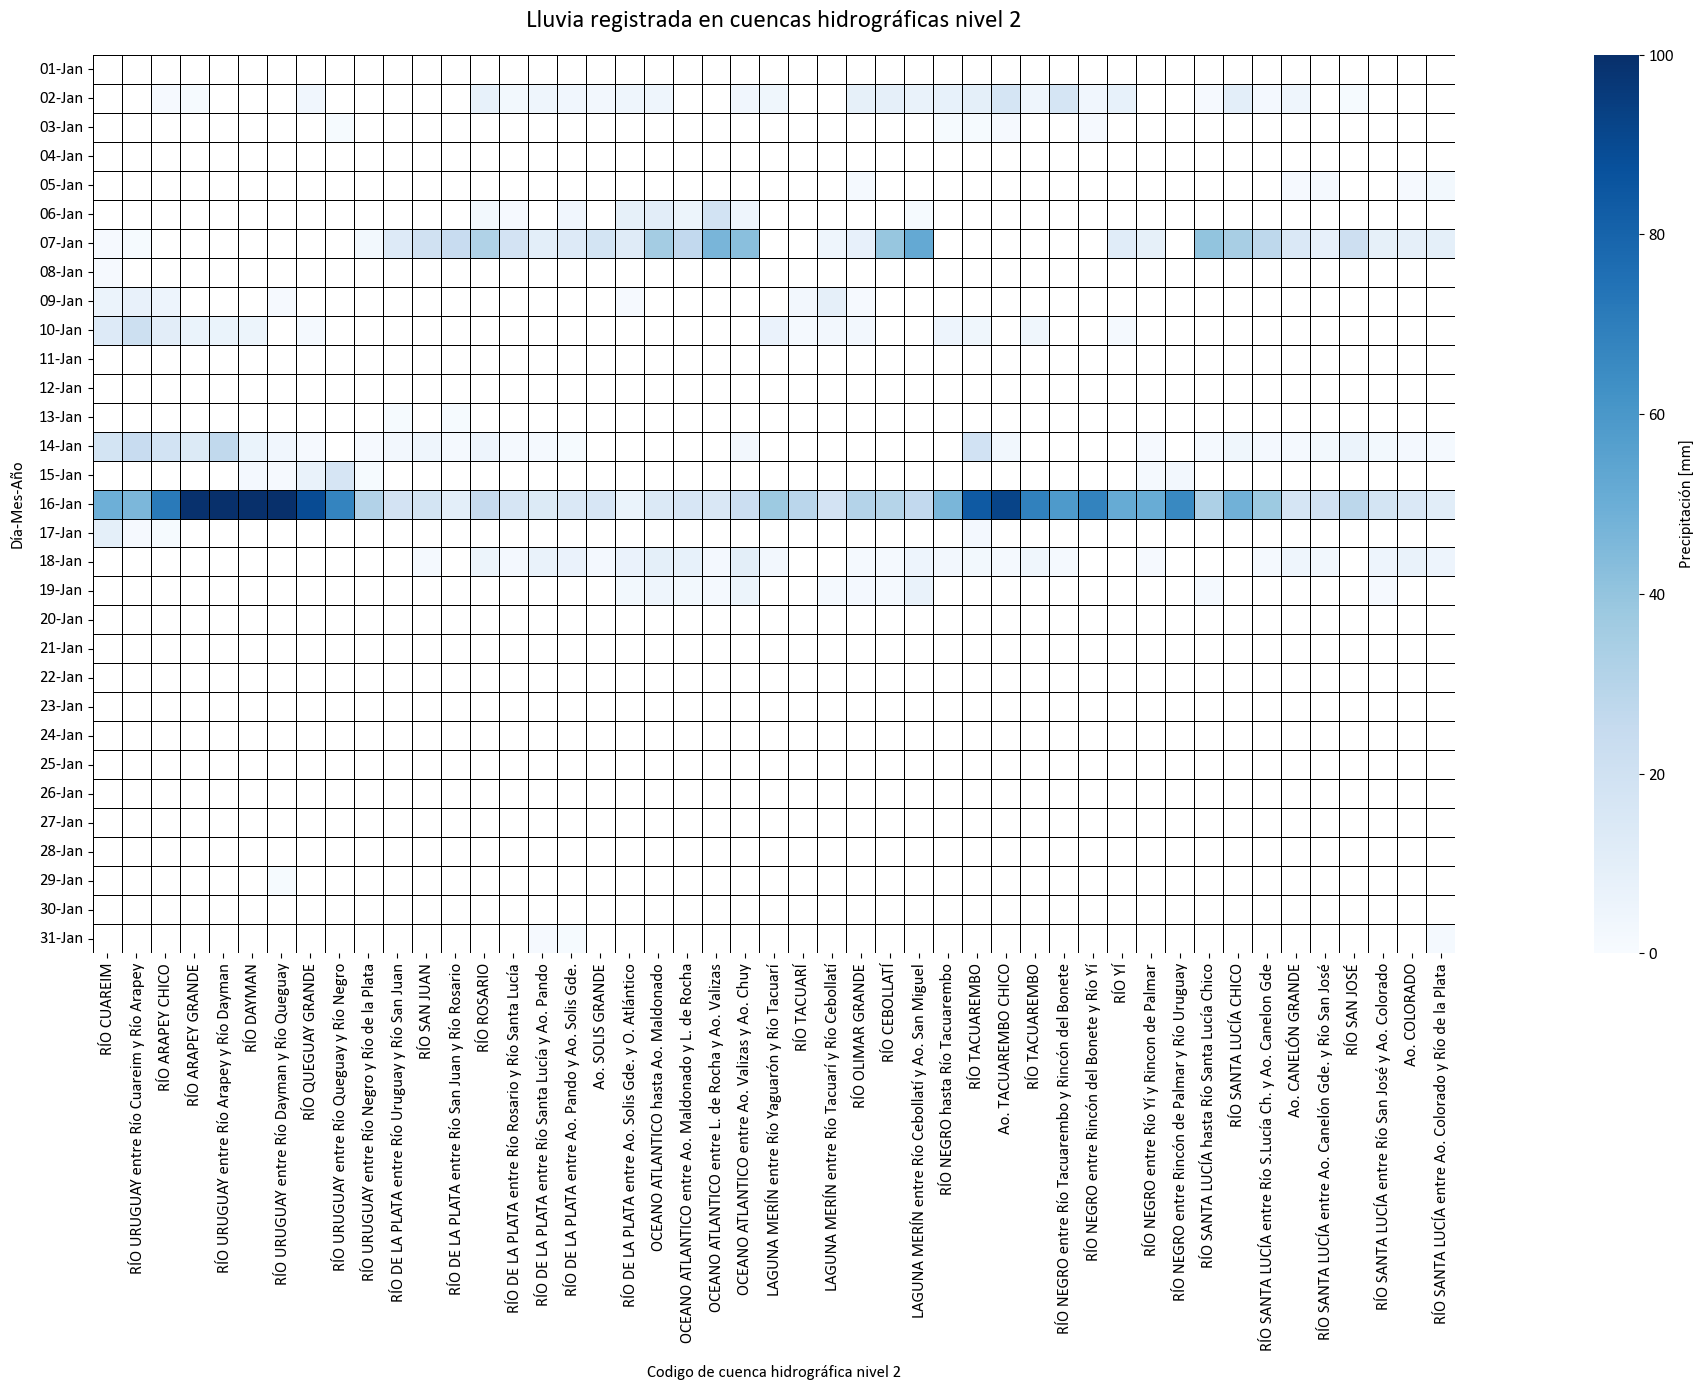

In [32]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

ax.set_xticklabels(allbasins_n2.nombre,rotation=90)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

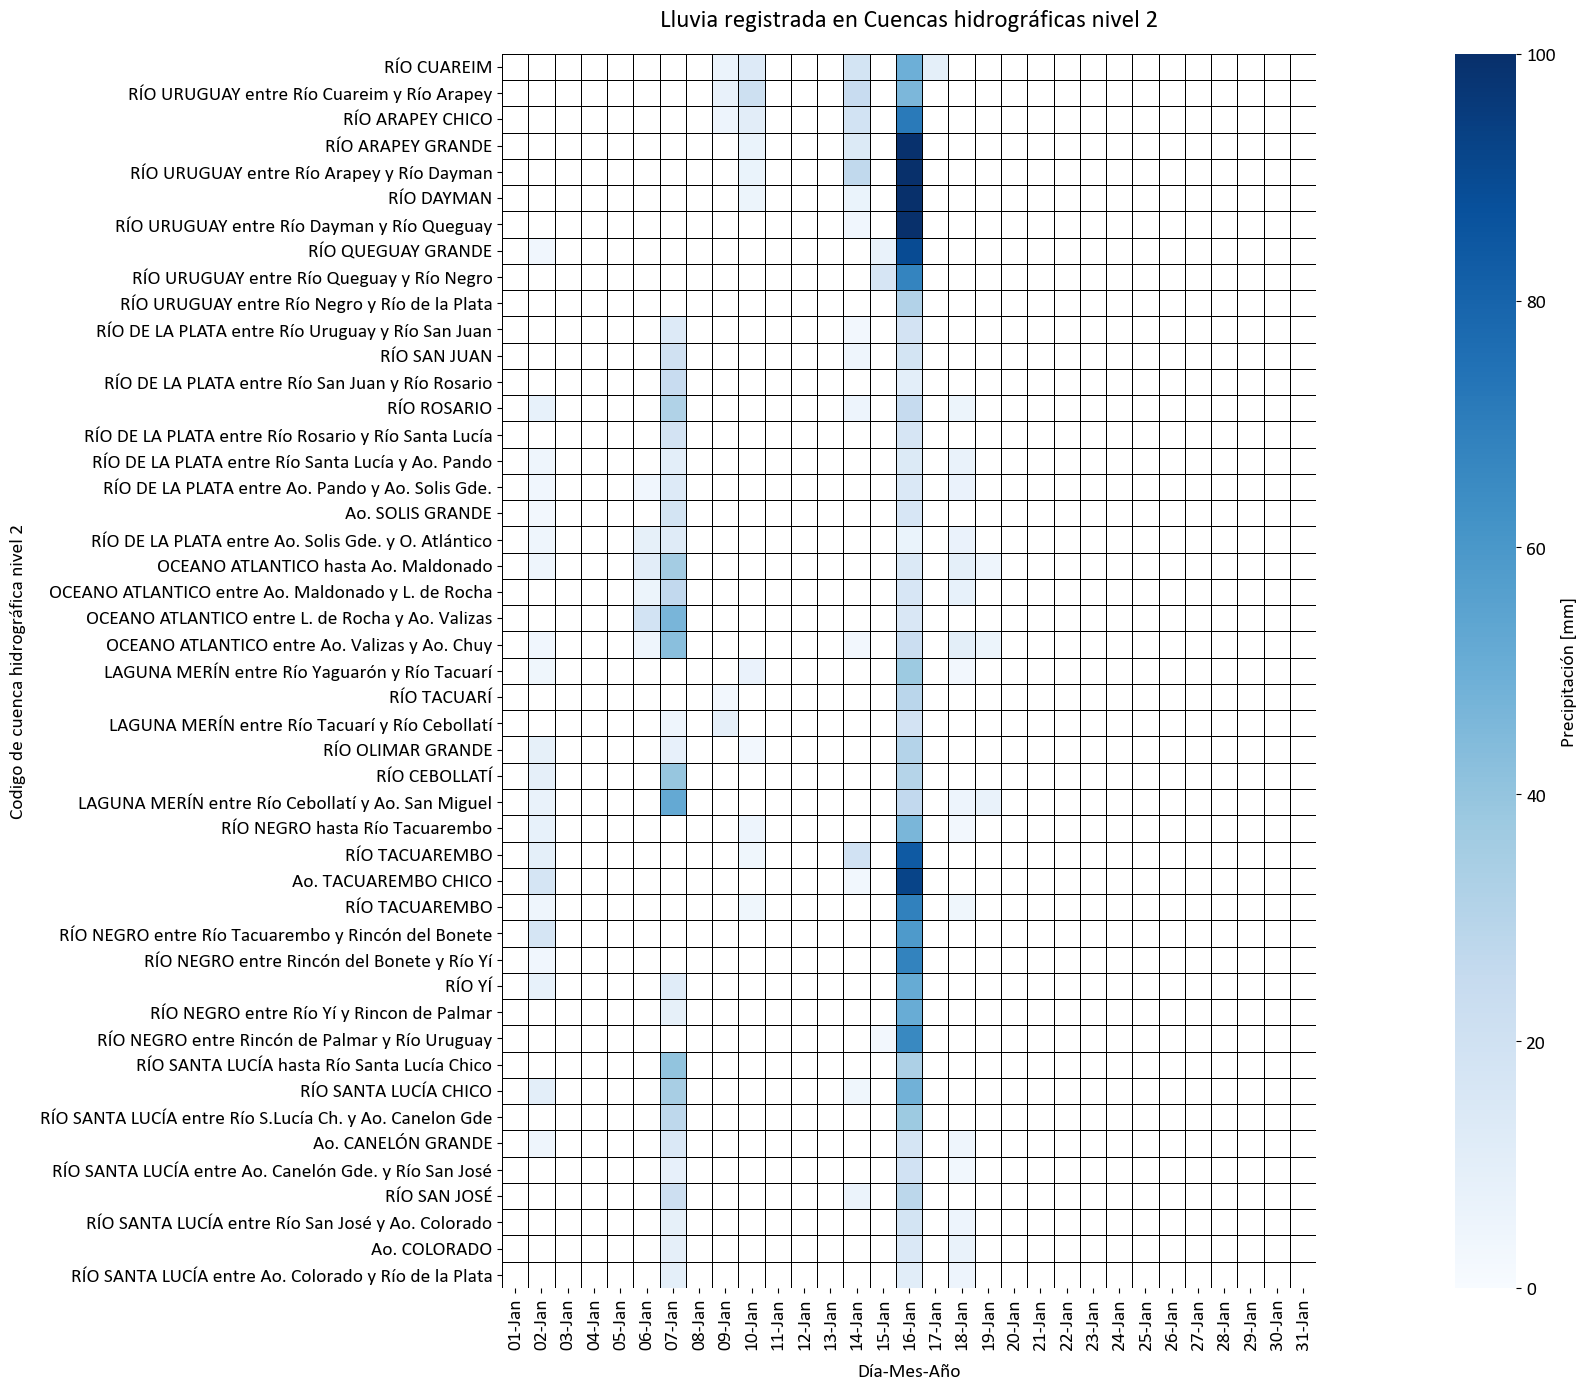

In [33]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = False,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

ax.set_yticklabels(allbasins_n2.nombre,rotation=0)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')